## **Step 1: Load and Explore the Data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv('/content/force2020_data.csv')
data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [ ]:
data.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


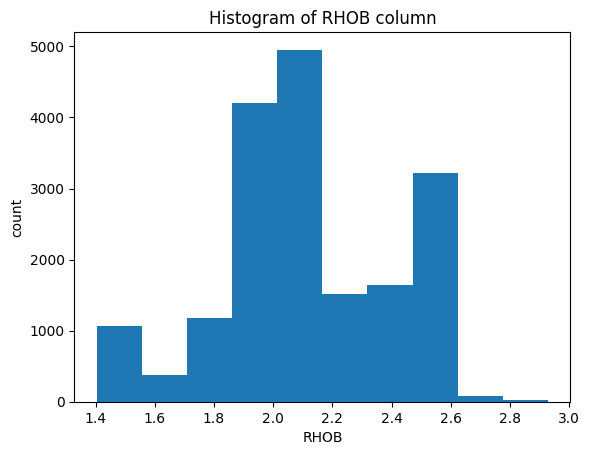

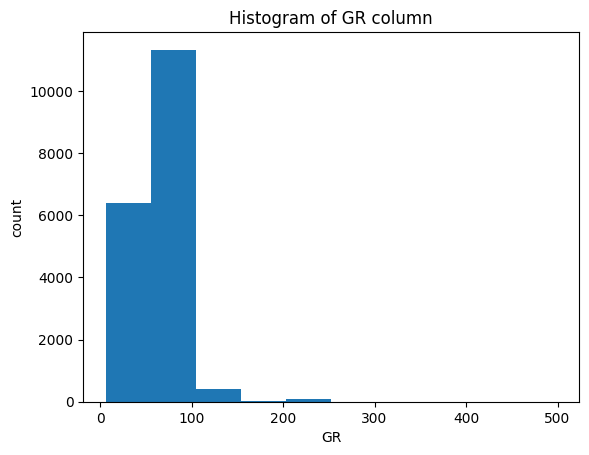

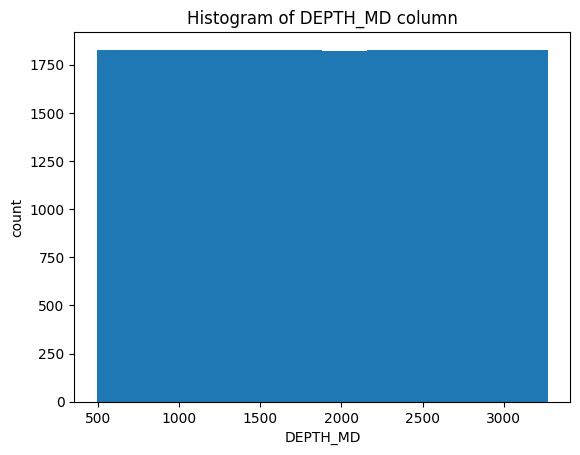

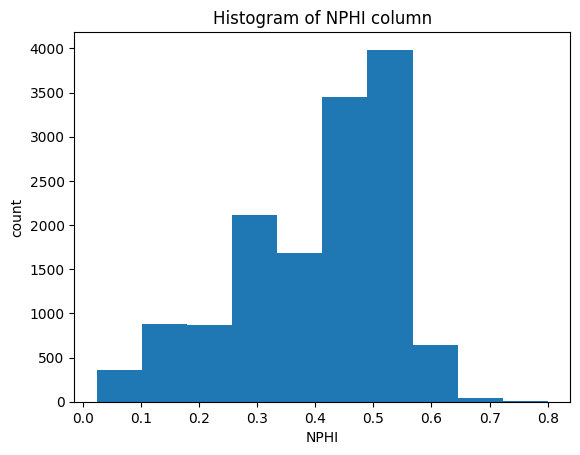

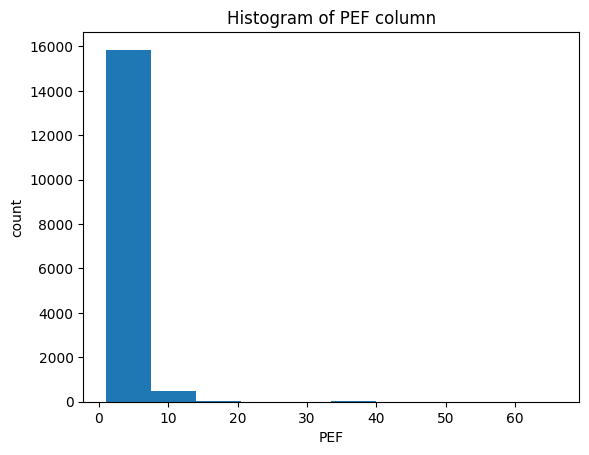

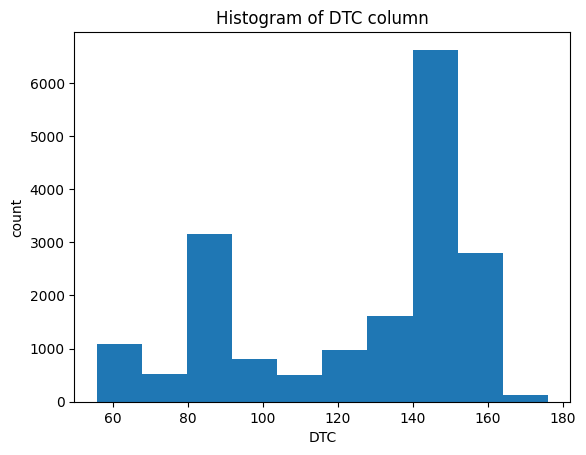

In [ ]:
for col in data:
    plt.hist(data[col])
    plt.title("Histogram of {} column".format(col))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

## **Step 2: Preprocess the Data**

In [ ]:
data.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,4238
PEF,1830
DTC,81


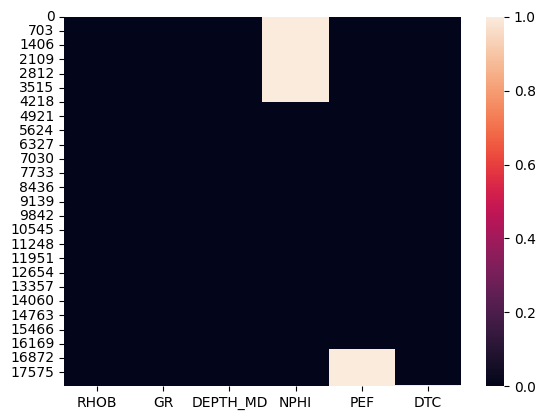

In [ ]:
sns.heatmap(data.isna())
plt.show()

In [ ]:
for col in data:
  data[col] = data[col].fillna(data[col].mode()[0])

In [ ]:
data.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,0
PEF,0
DTC,0


In [ ]:
for col in data:
  data[col] = (data[col]-data[col].min())/(data[col].max()-data[col].min())

In [ ]:
data

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,0.314847,0.150172,0.000000,0.349347,0.306142,0.876716
1,0.318528,0.148269,0.000055,0.349347,0.282573,0.872327
2,0.322946,0.139258,0.000109,0.349347,0.331919,0.868752
3,0.319919,0.135315,0.000164,0.349347,0.479572,0.868550
4,0.312121,0.132982,0.000219,0.349347,0.576522,0.868375
...,...,...,...,...,...,...
18265,0.804586,0.026840,0.999781,0.210689,0.000536,0.759511
18266,0.813056,0.030949,0.999836,0.207807,0.000536,0.759511
18267,0.838124,0.033389,0.999891,0.195563,0.000536,0.759511
18268,0.875567,0.032591,0.999945,0.193686,0.000536,0.759511


## **Step 3: Apply Clustering Algorithms**

K-Means Clustering

In [ ]:
wcss = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    print(f"K={k}: Silhouette Score={silhouette_scores[-1]:.3f}")
    print(f"K={k}: WCSS={wcss[-1]:.3f}")

K=2: Silhouette Score=0.661
K=2: WCSS=4217.170
K=3: Silhouette Score=0.774
K=3: WCSS=835.846
K=4: Silhouette Score=0.685
K=4: WCSS=680.190
K=5: Silhouette Score=0.638
K=5: WCSS=558.619
K=6: Silhouette Score=0.621
K=6: WCSS=534.345
K=7: Silhouette Score=0.447
K=7: WCSS=407.503
K=8: Silhouette Score=0.433
K=8: WCSS=353.854
K=9: Silhouette Score=0.437
K=9: WCSS=308.774
K=10: Silhouette Score=0.393
K=10: WCSS=295.359


K = 2 has the best Silhouette Score=0.774 and WCSS=835.846

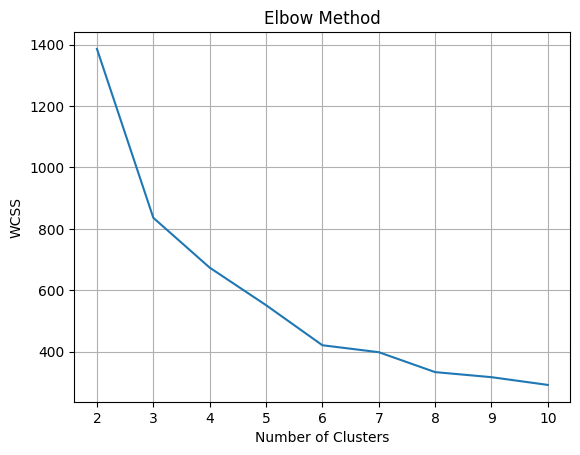

In [ ]:
plt.plot(range(2,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid()

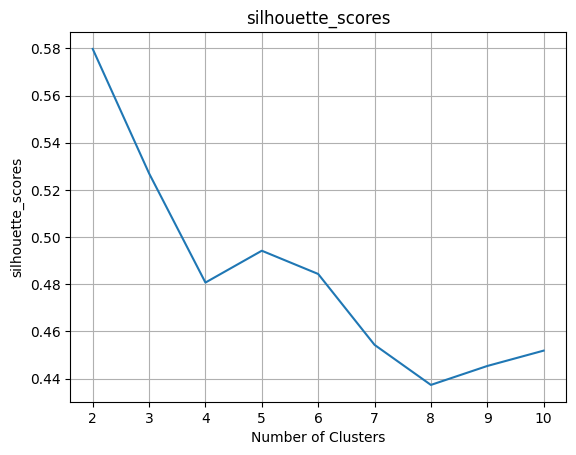

In [ ]:
plt.plot(range(2,11),silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette_scores')
plt.title('silhouette_scores')
plt.grid()

In [ ]:
optimal_k = 3  # Replace with chosen K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data)
data['Cluster'] = clusters  # Add cluster labels to DataFrame
print(f"Number of clusters: {optimal_k}")

Number of clusters: 3


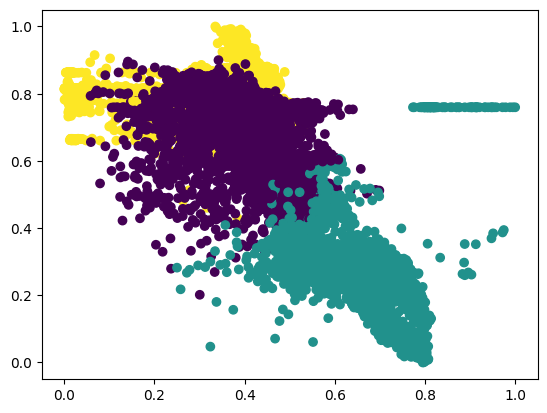

In [ ]:
plt.scatter(data['RHOB'],data['DTC'],c=clusters)
plt.show()

 Agglomerative Hierarchical Clustering:

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
k_range = range(2, 11)
best_k = 4

In [ ]:
linkage_methods = ['ward', 'complete', 'average']
silhouette_scores = {}
for linkage in linkage_methods:
    if linkage == 'ward':
        model = AgglomerativeClustering(n_clusters=best_k, linkage=linkage)
    else:
        model = AgglomerativeClustering(n_clusters=best_k, linkage=linkage, metric='euclidean')
    labels = model.fit_predict(data)
    score = silhouette_score(data, labels)
    silhouette_scores[linkage] = score
    print(f"Linkage: {linkage}, Silhouette_score: {score:.3f}")
# step 4: Fit best model
best_linkage = max(silhouette_scores, key=silhouette_scores.get)
if best_linkage == 'ward':
    final_model = AgglomerativeClustering(n_clusters=best_k, linkage=best_linkage)
else:
        final_model = AgglomerativeClustering(n_clusters=best_k, linkage=best_linkage, metric='euclidean')
labels = model.fit_predict(data)

Linkage: ward, Silhouette_score: 0.704
Linkage: complete, Silhouette_score: 0.732
Linkage: average, Silhouette_score: 0.753


Average Linkage Method has the best Silhouette score

In [ ]:
best_linkage = linkage_methods[np.argmax(silhouette_scores)]  # e.g., 'ward'
agg = AgglomerativeClustering(n_clusters=optimal_k, linkage=best_linkage)
data['Cluster'] = agg.fit_predict(data)  # Add cluster labels
print(f"Number of clusters: {best_k}")

Number of clusters: 4


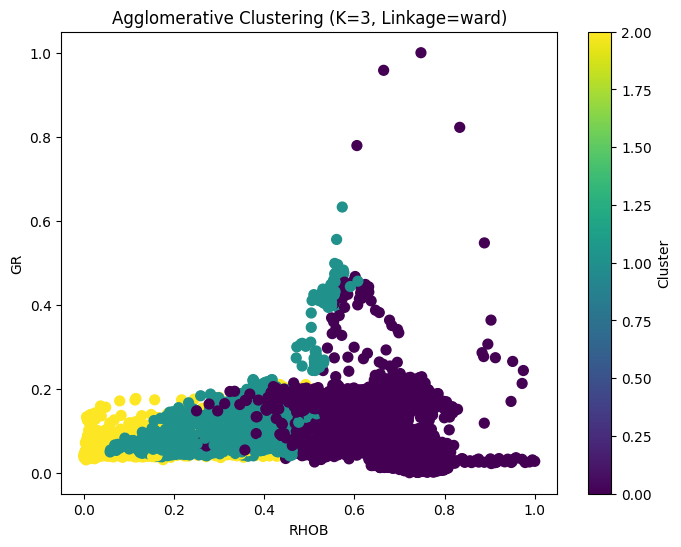

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['RHOB'], data['GR'], c=data['Cluster'], cmap='viridis', s=50)
plt.xlabel('RHOB')
plt.ylabel('GR')
plt.title(f'Agglomerative Clustering (K={optimal_k}, Linkage={best_linkage})')
plt.colorbar(label='Cluster')
plt.show()

DBSCAN:

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
eps_values = [0.3, 0.5, 1.0]
min_samples_values = [3, 5, 7]

best_score = -1
best_params = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labelss = dbscan.fit_predict(data)

        # Silhouette Score is undefined if only 1 cluster (all noise or all same cluster)
        if len(np.unique(labelss)) > 1 and len(np.unique(labelss)) < len(data):
            score = silhouette_score(data, labelss)
            print(f"eps={eps}, min_samples={min_samples}: Silhouette={score:.3f}, Clusters={len(np.unique(labelss))}")
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}
        else:
            print(f"eps={eps}, min_samples={min_samples}: Invalid for Silhouette (clusters={len(np.unique(labelss))})")

print("\nBest Parameters:", best_params)
print("Best Silhouette Score:", best_score)

eps=0.3, min_samples=3: Silhouette=0.707, Clusters=4
eps=0.3, min_samples=5: Silhouette=0.707, Clusters=5
eps=0.3, min_samples=7: Silhouette=0.707, Clusters=5
eps=0.5, min_samples=3: Silhouette=0.774, Clusters=3
eps=0.5, min_samples=5: Silhouette=0.774, Clusters=3
eps=0.5, min_samples=7: Silhouette=0.774, Clusters=3
eps=1.0, min_samples=3: Silhouette=0.774, Clusters=3
eps=1.0, min_samples=5: Silhouette=0.774, Clusters=3
eps=1.0, min_samples=7: Silhouette=0.774, Clusters=3

Best Parameters: {'eps': 0.5, 'min_samples': 3}
Best Silhouette Score: 0.7739837403138651


In [ ]:
best_eps = best_params['eps']
best_min_samples = best_params['min_samples']
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
data['Cluster'] = dbscan.fit_predict(data)
# Count clusters (label=-1 is noise)
n_clusters = len(np.unique(data['Cluster'])) - (1 if -1 in data['Cluster'] else 0)
print(f"Number of clusters: {n_clusters}, Noise points: {sum(data['Cluster'] == -1)}")

Number of clusters: 3, Noise points: 0


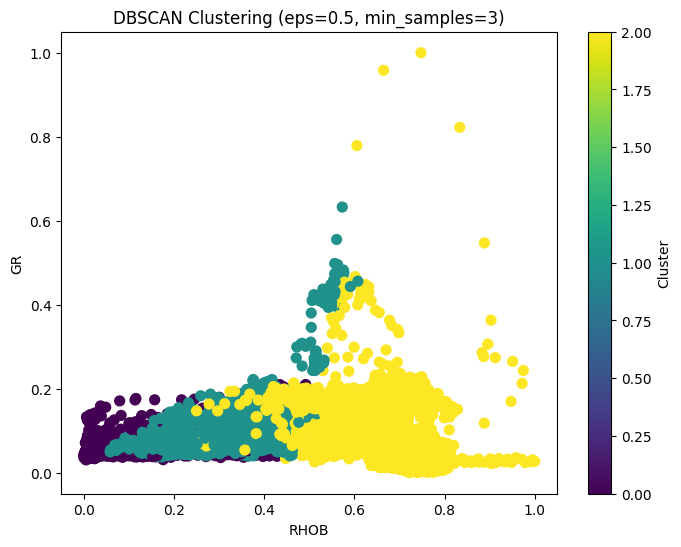

In [ ]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data['RHOB'], data['GR'], c=data['Cluster'], cmap='viridis', s=50)
plt.xlabel('RHOB')
plt.ylabel('GR')
plt.title(f'DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})')
plt.colorbar(label='Cluster')
plt.show()

 ## **Step 4: Compare and Evaluate Clustering Algorithms**

1. Use Silhouette Score and WCSS to compare clustering performance.

- For Kmeans clustering K = 2 has the best Silhouette Score=0.774 and WCSS=835.846
- For Hiearchical clustering Average Linkage Method has the best Silhouette score 0.753
- For DBScan the Best Silhouette Score: 0.7739837403138651

2. Summarize your observations in a markdown cell in the notebook:

- Best Silhouette Score: K-Means (0.774) , Agglomerative (0.753) and DBSCAN (0.773).
- WCSS: K-Means achieved the tightest clusters.
- DBSCAN identified no noise points.
- Hence K-Means algorithm worked best for the data.

- K-Means & DBSCAN: Both found 3 clusters (aligned with the Elbow Method).
Agglomerative: Found 3 dense clusters + noise 0

3. Any issues like noise/outliers?

- Poor Separation: Its showing overlapping clusters for the data.
- The outliers has been removed during the data cleaning.